<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Top_ten_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

url  = [ #
    #ibra50
    'https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_IBr50.csv',
    #ibra100
    'https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_IBr100.csv',
    #div
    'https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_Idiv.csv' ,
    #small
    'https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_Small.csv',
    #ibbr
    'https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_IBBR.csv',
    #low vol
    'https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_Ibov_LowVol.csv'
]

escolha = int(input('0-ibra50; 1-ibra100; 2-idiv; 3-small; 4- ibbr ; 5-low vol: '))
indice = { 0:'Ibra50' , 1:'Ibra100' , 2:'Idiv' , 3:'Small' , 4:'IBBr' , 5:'Low Vol'}
# if escolha == 4 :
#     df = pd.read_csv(url[escolha] ,sep=',' , decimal='.' , 
#               index_col=False , engine='python')
# else:   
df = pd.read_csv(url[escolha] ,sep=';' , decimal=',' , thousands='.' , 
                header=1 , skiprows=0 , skipfooter=2 , encoding='latin-1',index_col=False , engine='python')

data = yf.download((df['Código']+'.SA').to_list(),
                         period="max",
                         interval="1d",
                         auto_adjust=True,
                         back_adjust=True,
                         prepost=True)['Close']

bench = yf.download(['BOVA11.SA', 'SMAL11.SA' , 'DIVO11.SA'],
                         period="max",
                         interval="1d",
                         auto_adjust=True,
                         back_adjust=True,
                         prepost=True)['Close']

[*********************100%%**********************]  28 of 28 completed
[*********************100%%**********************]  3 of 3 completed


In [2]:
print(indice[escolha])
df

Low Vol


,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ALOS3,ALLOS,ON NM,2915145373,2.951
1,ABEV3,AMBEV S/A,ON,6861259002,3.968
2,AURE3,AUREN,ON NM,8583330205,4.229
3,BBSE3,BBSEGURIDADE,ON NM,2880373393,4.655
4,BRAP4,BRADESPAR,PN N1,4057037201,3.307
5,BBAS3,BRASIL,ON NM,3082912555,3.961
6,CXSE3,CAIXA SEGURI,ON NM,4813252463,3.344
7,CCRO3,CCR SA,ON NM,5296201819,3.091
8,CPLE6,COPEL,PNB N2,7530877260,3.598
9,CPFE3,CPFL ENERGIA,ON NM,2705187098,4.113


Os 10 melhores momentum no ultimo periodo

           % change                  sector
Ticker                                     
VIVT3.SA      25.04  Communication Services
FLRY3.SA      20.97              Healthcare
ITUB4.SA      17.07      Financial Services
TIMS3.SA      16.92  Communication Services
ITSA4.SA      16.72             Industrials
CPLE6.SA      16.47               Utilities
EQTL3.SA      15.67               Utilities
BBSE3.SA      15.56      Financial Services
ABEV3.SA      14.76      Consumer Defensive
ENEV3.SA      13.23               Utilities
IGTI11.SA     13.12             Real Estate
SANB11.SA     12.65      Financial Services
Ticker
BOVA11.SA    12.0
DIVO11.SA    13.0
SMAL11.SA     8.0
Name: 2024-09-12 00:00:00, dtype: float64 2


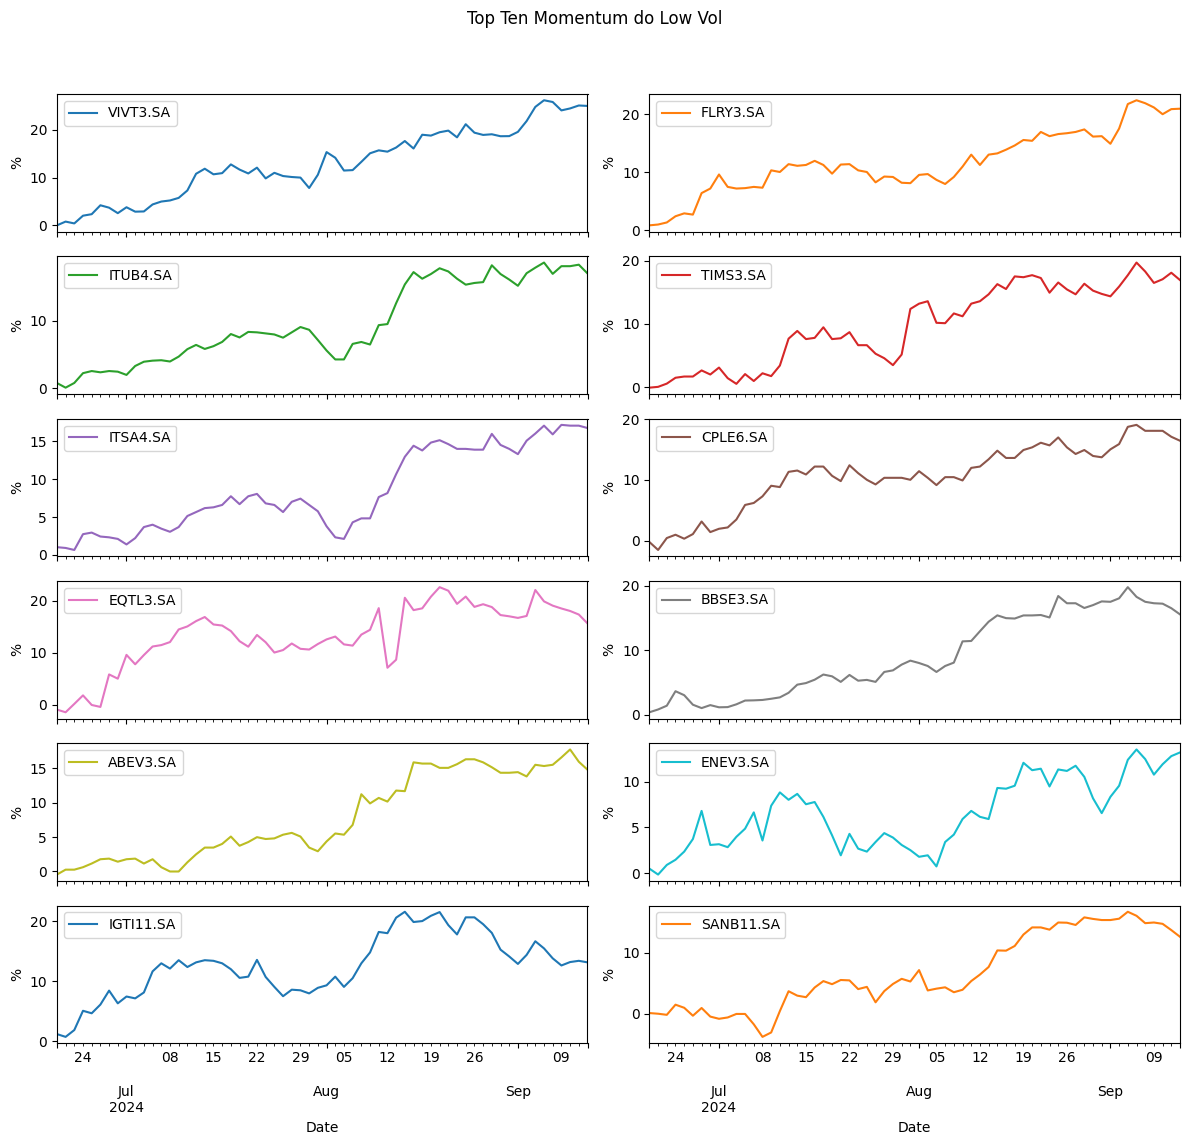

sector
Financial Services        3
Utilities                 3
Communication Services    2
Healthcare                1
Industrials               1
Consumer Defensive        1
Real Estate               1
Name: count, dtype: int64

In [3]:
periodo = 62 # dias, os 10 maiores retornos acumulados no ultimo tri

daily_returns = data.pct_change(fill_method=None)
bench_daily_returns = bench.pct_change(fill_method=None)
# print(daily_returns )

# ## remover ações que esticaram muito
# print(daily_returns.shape)
# # growth theshold
# threshold = 0.04
# # keep only the columns without a daily growth that big
# daily_returns = daily_returns.loc[:, ~(daily_returns >= threshold).any()]
# print(daily_returns.shape)


cum_returns = (1 + daily_returns[-periodo:]).cumprod() -1
# print(cum_returns.tail(2))
# last row, transpose, x100
latest = cum_returns.tail(1).T.mul(100)
latest.columns = ['% change']
topten = round(latest.sort_values(by='% change', ascending=False)[:12], 2)
# print(topten)

topten_info = {}
for i in topten.index:
    topten_info[i] = yf.Ticker(i).get_info()
info_df = pd.DataFrame.from_dict(topten_info,orient='index')
topten = topten.join(info_df['sector'])
print(topten)
bench_cum_returns = (1 + bench_daily_returns[-periodo:]).cumprod() -1
print(round(bench_cum_returns.iloc[-1]*100),2)

cum_returns[list(topten.index)].mul(100).plot(subplots=True,
                                          layout=(6, 2),
                                          figsize=(12,12),
                                          sharex=True,
                                          ylabel='%',
                                          title=f'Top Ten Momentum do {indice[escolha]}')
# tweek the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
info_df['sector'].value_counts()


### estratégia

todo mes compra as n de melhor momentum passado

In [4]:
def rolling_ret( df , m=1):
  '''
    df : dataframe com retornos 
    calcula retorno acumulado nas janelas de m periodos
  '''
  return (df+1).rolling(m).apply(np.prod) - 1 

def get_top( df , date , n=10):
  '''
    lista das colunas de df com os n maiores valores na data 'date'
  '''
  return df.loc[date].nlargest(n).index.to_list()

def port_ret(df , date ,  port = None):
  '''
    calcula a média aritmetica dos retornos (df) 
    da carteira (port) na 1a data a partir da data (date) 
  '''
  if port is None : port = get_top(df , date ,n = 5 )

  return df.loc[date:,port].mean(axis=1).values[0]

def find_start(df, threshold=5):
    # Contar o número de valores não-nulos (não NaN) por linha 
    non_nan_counts = df.notna().sum(axis=1)
    
    # Localizar o primeiro índice onde as 5 últimas linhas têm pelo menos 'threshold' valores não-nulos
    for idx in range(len(df)):
        if all(non_nan_counts[idx:] >= threshold):
            return idx
    return None  # Retorna None se nenhuma linha atender à condição

In [5]:
monthly_returns =  data.resample('M').last().pct_change(fill_method=None)
bench_returns = bench.resample('M').last().pct_change(fill_method=None)

(monthly_returns - rolling_ret(monthly_returns,1) ).tail()

Ticker,ABEV3.SA,ALOS3.SA,AURE3.SA,BBAS3.SA,BBSE3.SA,BRAP4.SA,CCRO3.SA,CPFE3.SA,CPLE6.SA,CXSE3.SA,...,ITUB4.SA,KLBN11.SA,RADL3.SA,SANB11.SA,SLCE3.SA,TAEE11.SA,TIMS3.SA,TRPL4.SA,VALE3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### momentum

In [6]:
returns = monthly_returns.copy()
janela = 3        # dias/meses
tam_carteira = 5  # papeis

mom = rolling_ret(returns,janela)
# determina uma linha a partir da qual tem um minimo "threshold" de non-NaN nas linhas
mom = mom[find_start(mom,threshold=10):]
mom

Ticker,ABEV3.SA,ALOS3.SA,AURE3.SA,BBAS3.SA,BBSE3.SA,BRAP4.SA,CCRO3.SA,CPFE3.SA,CPLE6.SA,CXSE3.SA,...,ITUB4.SA,KLBN11.SA,RADL3.SA,SANB11.SA,SLCE3.SA,TAEE11.SA,TIMS3.SA,TRPL4.SA,VALE3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-04-30,0.249966,NaN,NaN,-0.240506,NaN,-0.133333,NaN,0.857145,-0.085616,NaN,...,NaN,NaN,0.142808,NaN,NaN,NaN,NaN,0.291589,-0.166667,-0.111513
2000-05-31,0.295825,NaN,NaN,-0.248322,NaN,-0.076923,NaN,0.942859,-0.086956,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-0.243158,0.025000,-0.209770
2000-06-30,0.249973,NaN,NaN,0.025438,NaN,0.142857,NaN,1.177425,0.166102,NaN,...,NaN,NaN,4.288926,NaN,NaN,NaN,NaN,-0.205236,0.124750,-0.339144
2000-07-31,0.473687,NaN,NaN,0.041666,NaN,0.153846,NaN,0.038461,0.223220,NaN,...,NaN,NaN,4.288926,NaN,NaN,NaN,NaN,0.305354,0.112500,-0.241022
2000-08-31,0.548909,NaN,NaN,0.100000,NaN,0.200492,NaN,0.102940,0.123129,NaN,...,NaN,NaN,4.288926,NaN,NaN,NaN,NaN,0.239221,0.104735,-0.145455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,-0.081081,-0.102555,-0.039469,-0.055800,-0.031194,-0.078543,-0.121785,0.033802,-0.107243,0.071972,...,-0.077807,0.003178,-0.055527,-0.015183,-0.052393,0.011492,-0.097126,-0.025969,-0.014374,-0.184090
2024-06-30,-0.086469,-0.067040,0.036975,-0.033155,0.012608,-0.085340,-0.153419,0.008801,-0.028582,-0.050953,...,-0.055409,-0.054248,-0.058349,-0.022741,-0.077697,-0.015296,-0.074095,0.058018,0.022851,-0.078018
2024-07-31,-0.046914,0.105230,0.025022,-0.007753,0.092236,-0.070748,0.004055,0.018182,0.110011,-0.079183,...,0.090750,0.068315,0.080863,0.005244,-0.016431,0.002129,0.001056,-0.016420,-0.026228,0.035489


In [7]:
get_top(mom , '2024-07-31' , 5)

['EQTL3.SA', 'EGIE3.SA', 'CPLE6.SA', 'ALOS3.SA', 'BBSE3.SA']

In [8]:
port_ret( returns ,                    # retorno 
         '2024-08-31' ,                # no fim de agosto
         get_top(mom, '2024-07-31' , 5)# das 5 melhores até julho
         )

0.051433404890439814

carteiras com melhor momentum

In [9]:
Carteiras = []
Datas = [] 
Retornos = []
for i,date in enumerate(mom.index):
    Data = date                                     # data
    Cart = get_top( mom , date , tam_carteira)      # carteira de entrada
    if i==0 : Ret = 0                               # retorno mes subsequente
    else: Ret = port_ret( returns , Data ,  Carteiras[i-1])
    Carteiras.append(Cart)
    Datas.append(Data)
    Retornos.append(Ret)
estrategia = pd.DataFrame(Carteiras,index=Datas)
estrategia['estrategia'] = Retornos
estrategia


,0,1,2,3,4,estrategia
2000-04-30,CPFE3.SA,TRPL4.SA,ABEV3.SA,RADL3.SA,GOAU4.SA,0.000000
2000-05-31,CPFE3.SA,ABEV3.SA,VALE3.SA,RADL3.SA,BRAP4.SA,-0.188496
2000-06-30,RADL3.SA,CPFE3.SA,ABEV3.SA,CPLE6.SA,BRAP4.SA,0.988136
2000-07-31,RADL3.SA,ABEV3.SA,TRPL4.SA,CPLE6.SA,ITSA4.SA,0.020867
2000-08-31,RADL3.SA,ABEV3.SA,ITSA4.SA,TRPL4.SA,BRAP4.SA,0.018979
...,...,...,...,...,...,...
2024-05-31,GOAU4.SA,CXSE3.SA,EGIE3.SA,CPFE3.SA,TAEE11.SA,-0.035506
2024-06-30,EGIE3.SA,TRPL4.SA,GOAU4.SA,AURE3.SA,VALE3.SA,-0.012595
2024-07-31,EQTL3.SA,EGIE3.SA,CPLE6.SA,ALOS3.SA,BBSE3.SA,-0.022946
2024-08-31,VIVT3.SA,ITUB4.SA,BBSE3.SA,EQTL3.SA,FLRY3.SA,0.051433


In [10]:
compara = estrategia[['estrategia']].join(bench_returns,how='left')
compara.dropna(inplace=True)
compara

,estrategia,BOVA11.SA,DIVO11.SA,SMAL11.SA
2012-02-29,0.090906,0.041338,0.084691,0.087529
2012-03-31,0.067511,-0.018536,0.014414,0.024088
2012-04-30,0.056183,-0.041549,0.010657,-0.003099
2012-05-31,-0.082687,-0.119869,-0.081429,-0.152303
2012-06-30,0.077352,-0.003358,0.049107,0.057167
...,...,...,...,...
2024-05-31,-0.035506,-0.030397,-0.007926,-0.036119
2024-06-30,-0.012595,0.014495,0.014951,-0.004336
2024-07-31,-0.022946,0.030404,0.022152,0.021255
2024-08-31,0.051433,0.069010,0.062706,0.043350


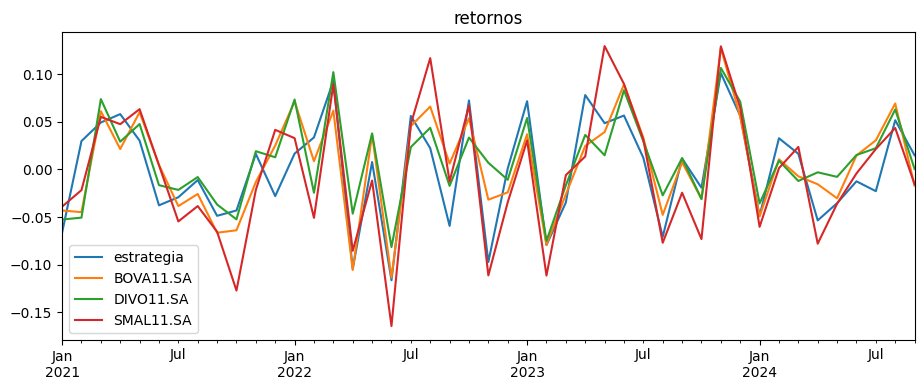

In [11]:
compara.loc['2021-01-01':].plot(title='retornos',figsize=(11,4));

In [12]:
compara.iloc[0]=[0.0]*4
compara = (compara+1.0).cumprod()
compara


,estrategia,BOVA11.SA,DIVO11.SA,SMAL11.SA
2012-02-29,1.000000,1.000000,1.000000,1.000000
2012-03-31,1.067511,0.981464,1.014414,1.024088
2012-04-30,1.127487,0.940686,1.025225,1.020914
2012-05-31,1.034258,0.827927,0.941742,0.865426
2012-06-30,1.114260,0.825147,0.987988,0.914900
...,...,...,...,...
2024-05-31,7.735884,1.832870,2.631231,1.397231
2024-06-30,7.638448,1.859438,2.670571,1.391173
2024-07-31,7.463177,1.915972,2.729730,1.420741
2024-08-31,7.847034,2.048193,2.900901,1.482331


<Axes: title={'center': 'retornos acumulados'}>

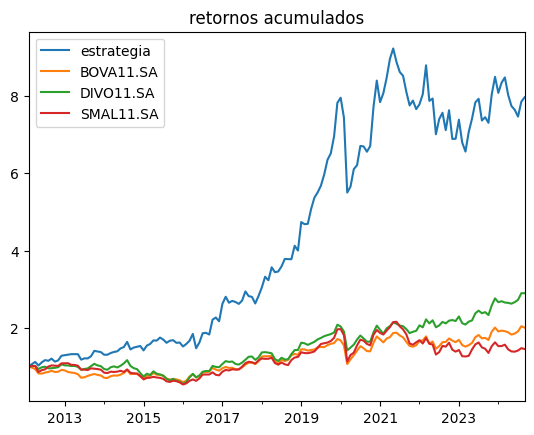

In [13]:
compara.plot(title='retornos acumulados')